In [1]:
# Importation des bibliothèques pour l'analyse de données
import pandas as pd
import numpy as np

# Importation des bibliothèques pour la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des bibliothèques pour la modélisation et l'évaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Chargement des données à partir du fichier CSV
data = pd.read_csv('FICHIER-PRINCIPAL_DONNEES-G_AKOUDZIN.csv')

In [3]:
# Affichage des premières lignes du dataframe afin de comprendre la structure de nos données
print(data.head())

      ID       SEXE  AGE  HTA ou DIABETE  CARDIOPATHIE    IMC TABAC OU ALCOOL  \
0  ID001   Feminin    38               0             0  19.36             non   
1  ID002   Feminin    57               0             0  23.12             non   
2  ID003   Feminin    33               0             0  23.83             non   
3  ID004  Masculin    41               0             0  17.23             oui   
4  ID005   Feminin    60               0             0  22.21             non   

   AVC DATE CONSULTATION  
0    0            Apr-23  
1    0            Apr-23  
2    0            Apr-23  
3    0            Apr-23  
4    0            Apr-23  


In [4]:
# Suppression la colonne 'ID' sans utilité pour notre etude 
data.drop(columns=['ID'], inplace=True)

In [5]:
# Suppression la colonne 'DATE CONSULTATION' n'etant pas un faceur clé determinant la survenue d'AVC 
data.drop(columns=['DATE CONSULTATION'], inplace=True)

In [6]:
# Vérification des types de données 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEXE             976 non-null    object 
 1   AGE              976 non-null    int64  
 2   HTA ou DIABETE   976 non-null    int64  
 3   CARDIOPATHIE     976 non-null    int64  
 4   IMC              976 non-null    float64
 5   TABAC OU ALCOOL  976 non-null    object 
 6   AVC              976 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 53.5+ KB
None


In [7]:
# Vérification des valeurs manquantes
print(data.isnull().sum())

SEXE               0
AGE                0
HTA ou DIABETE     0
CARDIOPATHIE       0
IMC                0
TABAC OU ALCOOL    0
AVC                0
dtype: int64


# ENCODAGE DES VARIABLES 

In [8]:
from sklearn.preprocessing import LabelEncoder

# Creation d'une instance de LabelEncoder
label_encoder = LabelEncoder()

# Convertions de la variable 'SEXE' en variables numériques
data['SEXE_encoded'] = label_encoder.fit_transform(data['SEXE'])

# Convertion de la variable 'TABAC OU ALCOOL' en variables numériques
data['TABAC_OU_ALCOOL_encoded'] = label_encoder.fit_transform(data['TABAC OU ALCOOL'])

A l'issus de l'encodage des variables categorielles, nous auront desormais :
    
    
    - SEXE : 
        . Feminin  : 0
        . Masculin : 1
        
    - TABAC_OU_ALCOOL :
        . Non : 0
        . Oui : 1

# ANALYSE EXPLORATOIRE DES DONNEES

### REPARTITION SELON LES ANTECEDENTS DE AVC

Proportions des personnes victimes d'AVC :
0    97.13%
1     2.87%
Name: AVC, dtype: object


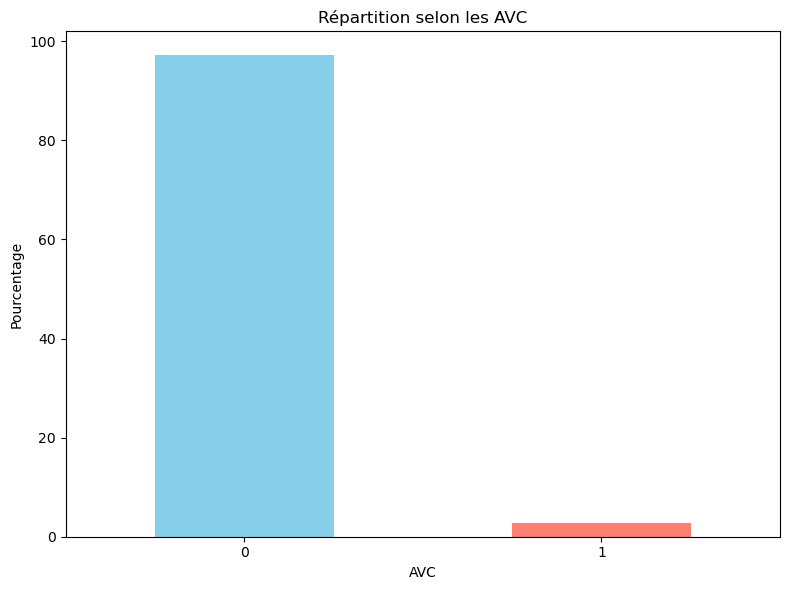

In [9]:
# Calcule du nombre de personnes ayant eu un AVC
avc_counts = data['AVC'].value_counts()

# Calcule des proportions en divisant par le nombre total de personnes
avc_proportions = (avc_counts / avc_counts.sum()) * 100

# Formatage des proportions avec le symbole de pourcentage
avc_proportions_formatted = avc_proportions.map("{:.2f}%".format)

# Affichage des proportions sous forme de pourcentage 
print("Proportions des personnes victimes d'AVC :")
print(avc_proportions_formatted)

# Création d'un graphique à barres pour la répartition des personnes avec ou sans AVC
plt.figure(figsize=(8, 6))
avc_proportions.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Répartition selon les AVC')
plt.xlabel('AVC')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### REPARTITION SELON LE SEXE

Feminin      60.14%
Masculin     39.86%
Name: SEXE, dtype: object


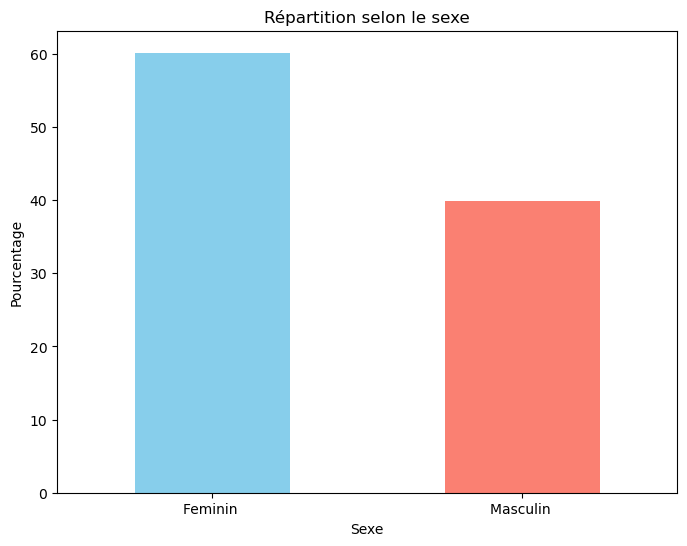

In [10]:
# Calcule du nombre de personnes de chaque sexe
sex_counts = data['SEXE'].value_counts()

# Calcule des proportions en divisant par le nombre total de personnes
sex_proportions = (sex_counts / sex_counts.sum()) * 100

# Formatage des proportions avec le symbole de pourcentage
sex_proportions_formatted = sex_proportions.map("{:.2f}%".format)

# Affichage des proportions sous forme de pourcentage
print(sex_proportions_formatted)

# Créer un graphique à barres pour la répartition selon le sexe
plt.figure(figsize=(8, 6))
sex_proportions.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Répartition selon le sexe')
plt.xlabel('Sexe')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.show()


### REPARTITION SELON ANTECEDENT DE HTA OU DIABETE

0    90.16%
1     9.84%
Name: HTA ou DIABETE, dtype: object


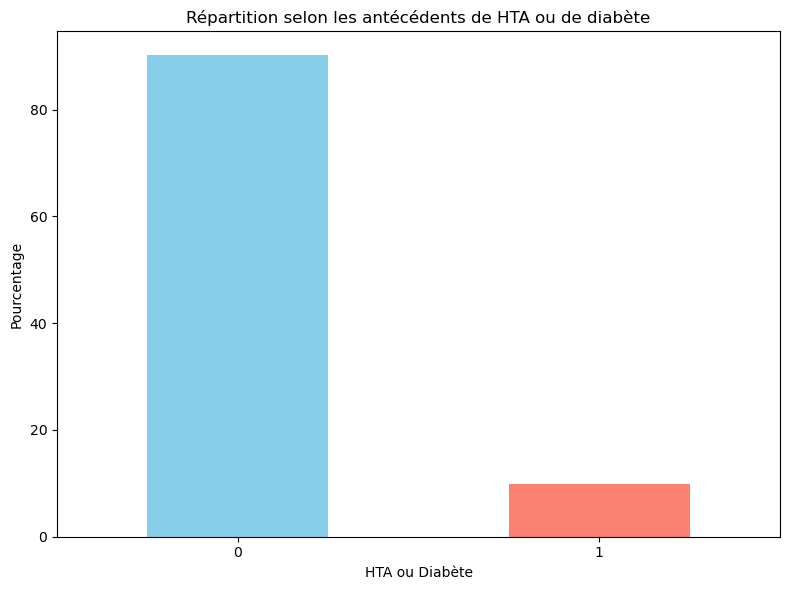

In [11]:
# Calcule du nombre de personnes avec antecedent de HTA ou DIABETE
hat_diab_counts = data['HTA ou DIABETE'].value_counts()

# Calcule des proportions en divisant par le nombre total de personnes
hat_diab_proportions = (hat_diab_counts / hat_diab_counts.sum()) * 100

# Formatage des proportions avec le symbole de pourcentage
hat_diab_proportions_formatted = hat_diab_proportions.map("{:.2f}%".format)

# Affichage des proportions sous forme de pourcentage 
print(hat_diab_proportions_formatted)

# Creation d'un graphique à barres pour la répartition des antécédents de HTA ou de diabète
plt.figure(figsize=(8, 6))
hat_diab_proportions.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Répartition selon les antécédents de HTA ou de diabète')
plt.xlabel('HTA ou Diabète')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### REPARTITION SELON ANTECEDENT DE CARDIOPATHIE 

0    93.24%
1     6.76%
Name: CARDIOPATHIE, dtype: object


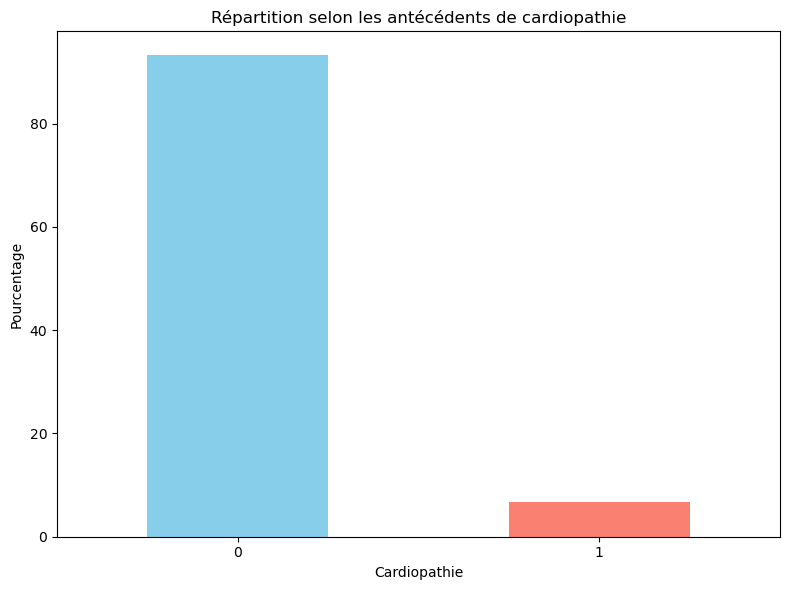

In [12]:
# Calcule du nombre de personnes avec antecedent de cardiopathie
cardio_counts = data['CARDIOPATHIE'].value_counts()

# Calcule des proportions en divisant par le nombre total de personnes
cardio_proportions = (cardio_counts / cardio_counts.sum()) * 100

# Formatage des proportions avec le symbole de pourcentage
cardio_proportions_formatted = cardio_proportions.map("{:.2f}%".format)

# Affichage des proportions sous forme de pourcentage 
print(cardio_proportions_formatted)

# Creation d'un graphique à barres pour la répartition des personnes avec ou sans cardiopathie
plt.figure(figsize=(8, 6))
cardio_proportions.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Répartition selon les antécédents de cardiopathie')
plt.xlabel('Cardiopathie')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### REPARTITION SELON CONSOMMATION DE TABAC OU ALCOOL 

In [13]:
# Calculer le nombre de personnes consommant et ne consommant pas de tabac ou d'alcool
tabac_alcool_counts = data['TABAC OU ALCOOL'].value_counts()

# Calculer les proportions en divisant par le nombre total de personnes
tabac_alcool_proportions = (tabac_alcool_counts / tabac_alcool_counts.sum()) * 100

# Formater les proportions avec le symbole de pourcentage
tabac_alcool_proportions_formatted = tabac_alcool_proportions.map("{:.2f}%".format)

# Afficher les proportions sous forme de pourcentage avec le symbole
print(tabac_alcool_proportions_formatted)

non     77.77%
oui     12.91%
oui      9.32%
Name: TABAC OU ALCOOL, dtype: object


Il semble qu'il y ait une redondance dans les valeurs de la variable "TABAC OU ALCOOL". Nous allons donc nettoyer nos données en utilisant la fonction str.strip() pour supprimer les espaces en début et fin de chaîne et la fonction str.lower() pour mettre toutes les lettres en minuscules avant de determiner les proportions.

['non' 'oui']
non    77.77%
oui    22.23%
Name: TABAC OU ALCOOL, dtype: object


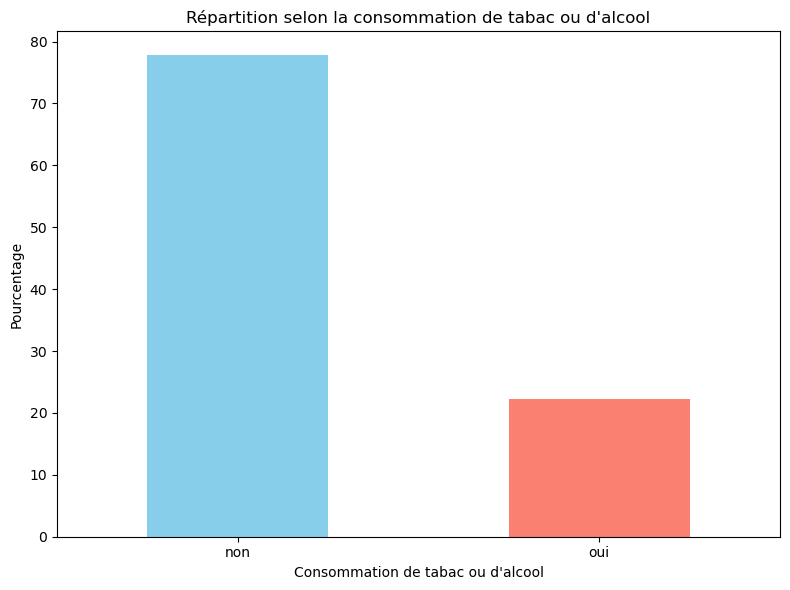

In [14]:
# Nettoyage des valeurs de la variable "TABAC OU ALCOOL"
data['TABAC OU ALCOOL'] = data['TABAC OU ALCOOL'].str.strip().str.lower()

# Vérification des valeurs uniques après nettoyage
unique_values = data['TABAC OU ALCOOL'].unique()
print(unique_values)

# Calcule des proportions après nettoyage
tabac_alcool_counts = data['TABAC OU ALCOOL'].value_counts()
tabac_alcool_proportions = (tabac_alcool_counts / tabac_alcool_counts.sum()) * 100

# Formatage des proportions avec le symbole de pourcentage
tabac_alcool_proportions_formatted = tabac_alcool_proportions.map("{:.2f}%".format)

# Affichage des proportions après nettoyage
print(tabac_alcool_proportions_formatted)

# Creation d'un graphique à barres pour la répartition des personnes fumant ou ne fumant pas
plt.figure(figsize=(8, 6))
tabac_alcool_proportions.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Répartition selon la consommation de tabac ou d\'alcool')
plt.xlabel('Consommation de tabac ou d\'alcool')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### REPARTITION SELON L'IMC 

Poids normal              32.069672
Surpoids                  30.840164
Obésité de classe 1       20.286885
Obésité de classe 2        7.786885
Insuffisance pondérale     6.967213
Obésité de classe 3        2.049180
Name: IMC, dtype: float64


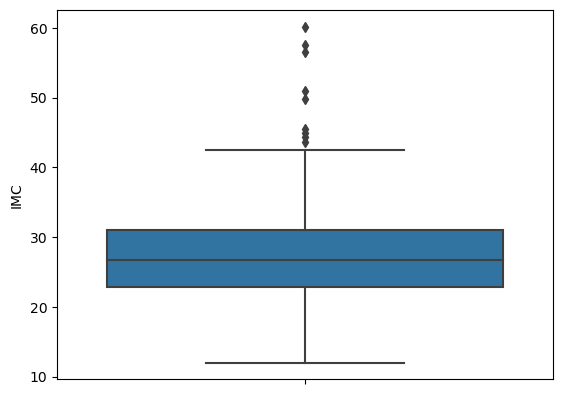

In [15]:
# Définition des catégories d'IMC selon l'OMS
categories_imc = {
    (0, 18.5): 'Insuffisance pondérale',
    (18.5, 24.9): 'Poids normal',
    (25, 29.9): 'Surpoids',
    (30, 34.9): 'Obésité de classe 1',
    (35, 39.9): 'Obésité de classe 2',
    (40, float('inf')): 'Obésité de classe 3'
}

# Calcule des proportions de chaque catégorie d'IMC
imc_categories = pd.cut(data['IMC'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                        labels=['Insuffisance pondérale', 'Poids normal', 'Surpoids',
                                'Obésité de classe 1', 'Obésité de classe 2', 'Obésité de classe 3'])
imc_distribution = imc_categories.value_counts(normalize=True) * 100

print(imc_distribution)

# Affichage des valeurs de l'IMC 
sns.boxplot(y = 'IMC', data = data); 


Les valeurs de l'IMC contiennent des valeurs abberantes que nous traiterons plus bas. 

# GESTION DES VALEURS ABBERANTES DE L'IMC

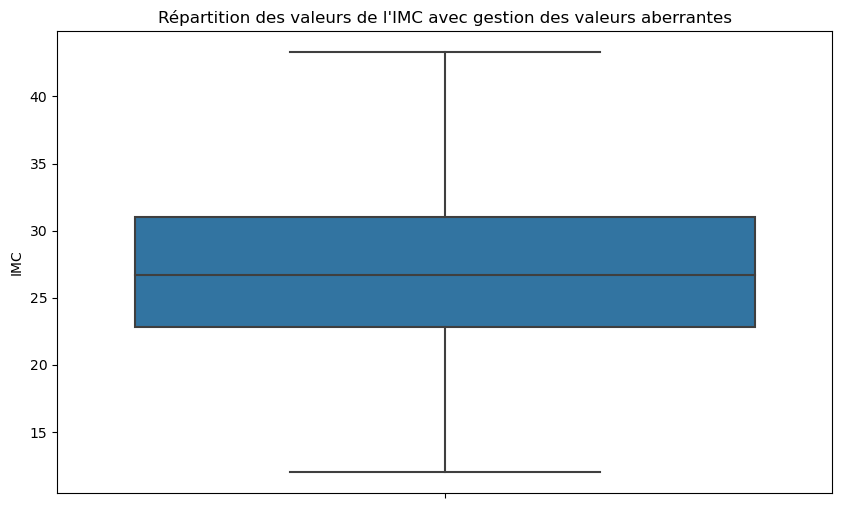

In [16]:
# Calcule des quartiles Q1 et Q3
Q1 = data['IMC'].quantile(0.25)
Q3 = data['IMC'].quantile(0.75)

# Calcule de l'écart interquartile (IQR)
IQR = Q3 - Q1

# Détermination des limites supérieure et inférieure afin de détecter les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remplacement des valeurs aberrantes de l'IMC par les limites supérieure et inférieure de l'IQR
data.loc[data['IMC'] < lower_bound, 'IMC'] = lower_bound
data.loc[data['IMC'] > upper_bound, 'IMC'] = upper_bound

# Affichage des valeurs de l'IMC après gestion des valeurs abberantes
plt.figure(figsize=(10, 6))
sns.boxplot(y='IMC', data=data)
plt.title('Répartition des valeurs de l\'IMC avec gestion des valeurs aberrantes')
plt.ylabel('IMC')
plt.show()


### VISUALISATION DU TAUX DE PERSONNES VICTIMES D'AVC SELON L'AGE ET LE SEXE

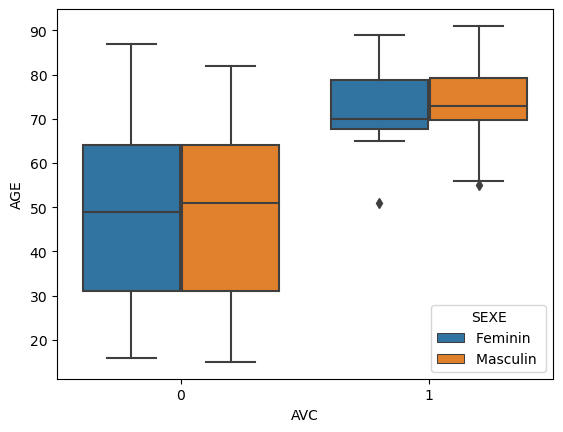

In [17]:
sns.boxplot(x ='AVC', y ='AGE', hue ='SEXE' , data = data);

### VISUALISATION DU TAUX DE PERSONNES VICTIMES D'AVC SELON DES ANTECEDENTS DE CARDIOPATHIE OU DE HTA ET DE DIABETE

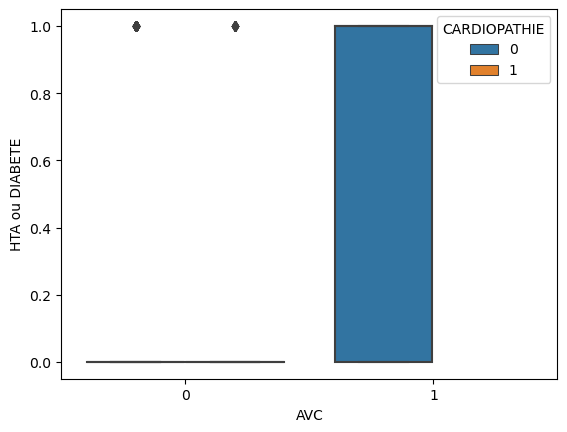

In [18]:
sns.boxplot(x ='AVC', y ='HTA ou DIABETE', hue ='CARDIOPATHIE' , data = data);

# MATRIX DE CORRELATION

C:\Users\hp\AppData\Local\Temp\ipykernel_4208\2742844986.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


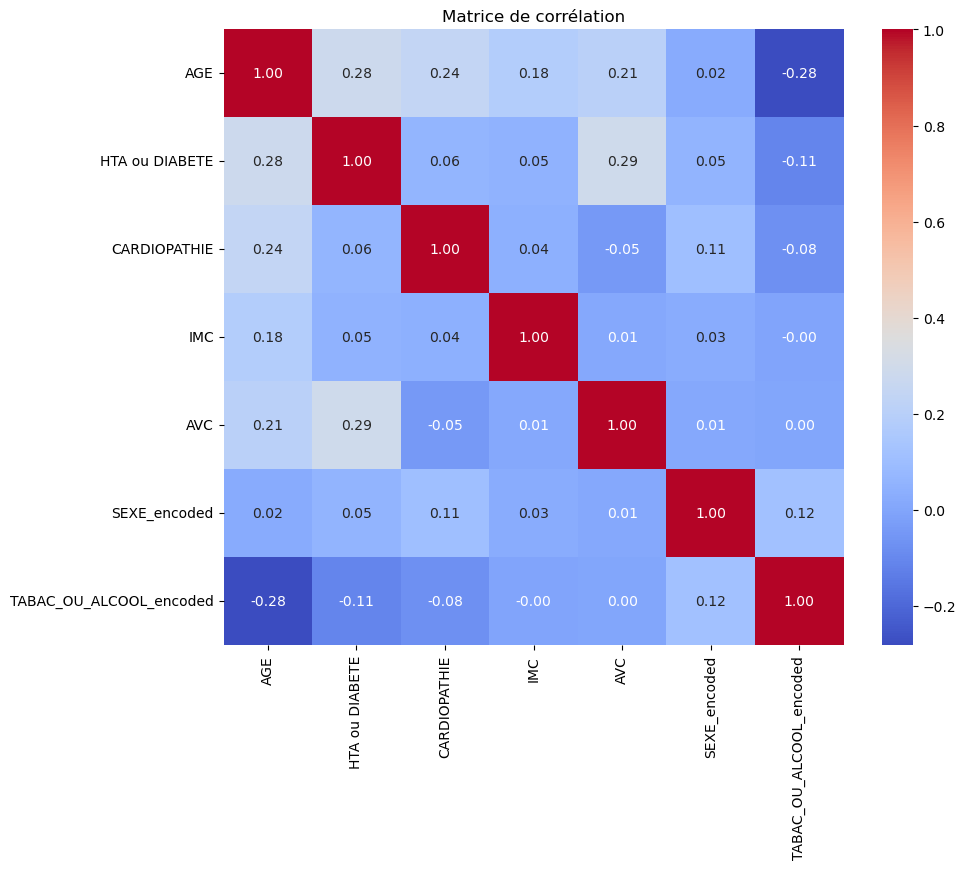

In [19]:
# Génération de la matrice de corrélation
correlation_matrix = data.corr()

# Création d'une heatmap pour la visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')

# Sauvegarde du graphique de la matrice de corrélation
plt.savefig('correlation_matrix.png')  # Sauvegarde du graphique au format PNG
plt.show()


# CREATION ET EVALUATION DU MODELE 

### DIVISION ET SUR-EHANTILLONNAGE DES PARTITIONS DE DONNEES (60% ENTRAINEMENT, 20% VALIDATION ET 20% TEST)

In [1]:
# Application de One-Hot Encoding sur les variables catégorielles
data_encoded = pd.get_dummies(data, drop_first=True)

# Division des données en ensembles d'entraînement, de validation et de test
# Séparation des variables indépendantes (X) de la variable cible (y)
X = data_encoded.drop('AVC', axis=1)
y = data_encoded['AVC']

# Division des données en 60% entraînement, 20% validation et 20% test en équilibrant les classes
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Suréchantillonnage (oversampling) sur les données d'entraînement et de validation
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
X_val_resampled, y_val_resampled = oversampler.fit_resample(X_val, y_val)

# Vérification des proportions dans chaque ensemble après suréchantillonnage
print("Proportions dans l'ensemble d'entraînement suréchantillonné:")
print(X_train_resampled['SEXE'].value_counts(normalize=True))
print(y_train_resampled.value_counts(normalize=True))

print("\nProportions dans l'ensemble de validation suréchantillonné:")
print(X_val_resampled['SEXE'].value_counts(normalize=True))
print(y_val_resampled.value_counts(normalize=True))

print("\nProportions dans l'ensemble de test:")
print(X_test['SEXE'].value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


NameError: name 'pd' is not defined

###  AFFICHAGE DE GRAPHIQUE APRES SUR-ECHANTILLONNAGE DES PARTITIONS - VARIABLE AVC

In [ ]:
# Proportions dans l'ensemble d'entraînement suréchantillonné
plt.figure(figsize=(10, 6))
plt.bar(['Non-AVC', 'AVC'], train_resampled['AVC'].value_counts(normalize=True), color=['skyblue', 'salmon'])
plt.title("Proportions dans l'ensemble d'entraînement suréchantillonné")
plt.xlabel('AVC')
plt.ylabel('Proportion')
plt.savefig('train_proportions.png')  # Sauvegarde du graphique dans un fichier PNG
plt.show()

# Proportions dans l'ensemble de validation suréchantillonné
plt.figure(figsize=(10, 6))
plt.bar(['Non-AVC', 'AVC'], validation_resampled['AVC'].value_counts(normalize=True), color=['skyblue', 'salmon'])
plt.title("Proportions dans l'ensemble de validation suréchantillonné")
plt.xlabel('AVC')
plt.ylabel('Proportion')
plt.savefig('validation_proportions.png')  # Sauvegarde du graphique dans un fichier PNG
plt.show()

# Proportions dans l'ensemble de test suréchantillonné
plt.figure(figsize=(10, 6))
plt.bar(['Non-AVC', 'AVC'], test_resampled['AVC'].value_counts(normalize=True), color=['skyblue', 'salmon'])
plt.title("Proportions dans l'ensemble de test suréchantillonné")
plt.xlabel('AVC')
plt.ylabel('Proportion')
plt.savefig('test_proportions.png')  # Sauvegarde du graphique dans un fichier PNG
plt.show()


###  AFFICHAGE DE GRAPHIQUE APRES SUR-ECHANTILLONNAGE DES PARTITIONS - VARIABLE SEXE

In [ ]:
# Proportions dans l'ensemble d'entraînement suréchantillonné
plt.figure(figsize=(10, 6))
plt.bar(['Féminin', 'Masculin'], train_resampled['SEXE'].value_counts(normalize=True), color=['skyblue', 'salmon'])
plt.title("Proportions dans l'ensemble d'entraînement suréchantillonné")
plt.xlabel('SEXE')
plt.ylabel('Proportion')
plt.savefig('train_sexe_proportions.png')  # Sauvegarde du graphique dans un fichier PNG
plt.show()

# Proportions dans l'ensemble de validation suréchantillonné
plt.figure(figsize=(10, 6))
plt.bar(['Féminin', 'Masculin'], validation_resampled['SEXE'].value_counts(normalize=True), color=['skyblue', 'salmon'])
plt.title("Proportions dans l'ensemble de validation suréchantillonné")
plt.xlabel('SEXE')
plt.ylabel('Proportion')
plt.savefig('validation_sexe_proportions.png')  # Sauvegarde du graphique dans un fichier PNG
plt.show()

# Proportions dans l'ensemble de test suréchantillonné
plt.figure(figsize=(10, 6))
plt.bar(['Féminin', 'Masculin'], test_resampled['SEXE'].value_counts(normalize=True), color=['skyblue', 'salmon'])
plt.title("Proportions dans l'ensemble de test suréchantillonné")
plt.xlabel('SEXE')
plt.ylabel('Proportion')
plt.savefig('test_sexe_proportions.png')  # Sauvegarde du graphique dans un fichier PNG
plt.show()


### ENTRAINEMENT DES MODELES AVEC LES DONNES EQUILIBRES

In [ ]:
# Entraîner le modèle de régression logistique
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_resampled, y_train_resampled)

# Entraîner le modèle de forêt aléatoire
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_resampled, y_train_resampled)

# Entraîner le modèle de support vecteur machine
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

# Entraîner le modèle d'arbres de décision
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_resampled, y_train_resampled)


### PREDICTIONS SUR LES DONNEES DE VALIDATION ET EVALUATION DES RESUTATS AVEC DIFFERENTES METRIQUES

In [ ]:
# Initialisation des listes pour stocker les résultats
results = []

# Boucle sur les configurations
for config in configurations:
    model = config['model']
    model_name = config['name']
    
    # Initialisation de la grille de recherche pour le modèle actuel
    if model_name == 'Arbres de Décision':
        param_grid = {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif model_name == 'Forêt Aléatoire':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    else:
        param_grid = {
            'C': [0.1, 1, 10, 100]
        }
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=5)
    
    # Recherche des meilleures hyperparamètres sur les données d'entraînement
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Meilleur modèle trouvé avec les meilleurs hyperparamètres
    best_model = grid_search.best_estimator_
    
    # Prédiction sur les données de validation
    y_pred = best_model.predict(X_val_resampled)
    
    # Calcul des métriques
    auc = roc_auc_score(y_val_resampled, y_pred)
    accuracy = accuracy_score(y_val_resampled, y_pred)
    recall = recall_score(y_val_resampled, y_pred)
    confusion = confusion_matrix(y_val_resampled, y_pred)
    
    # Stockage des résultats
    results.append({'Model': model_name, 'AUC': auc, 'Accuracy': accuracy, 'Recall': recall, 'Confusion Matrix': confusion})

# Affichage des résultats
for result in results:
    print("Model:", result['Model'])
    print("AUC:", result['AUC'])
    print("Accuracy:", result['Accuracy'])
    print("Recall:", result['Recall'])
    print("Confusion Matrix:\n", result['Confusion Matrix'])
    print("\n")


In [ ]:
# Affichage des meilleurs hyperparamètres trouvés pour chaque modèle
for config, result in zip(configurations, results):
    model_name = config['name']
    best_params = grid_search.best_params_
    print(f"Meilleurs hyperparamètres pour le modèle {model_name}: {best_params}")

### APPLICATION DE MEILLEUR MODELE (SVM) AUX DONNEES DE TEST AVEC LES MEILLEURS HYPERPARAMTRES

In [ ]:
# Utilisation des meilleurs hyperparamètres trouvés pour le modèle SVM
best_params_svm = {'C': 100}  

# Initialisation du modèle SVM avec les meilleurs hyperparamètres
svm_model_best = SVC(**best_params_svm)

# Entraînement du modèle sur les données d'entraînement resamplées
###################################################################svm_model_best.fit(X_train_resampled, y_train_resampled)

# Prédiction sur les données de test
y_pred_test = svm_model_best.predict(X_test)

# Calcul des métriques sur les données de test
test_auc = roc_auc_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_confusion = confusion_matrix(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)

# Affichage des résultats
print("AUC :", test_auc)
print("Accuracy:", test_accuracy)
print("Matrix de confusion:\n", test_confusion)
print("Recall :", test_recall)
